#### Exercício 1 - Decomposição de Viés e Variância do Erro de Teste
- **Aluno:** Giovanni Martins de Sá Júnior<br>
- **Disciplina:** Introdução à Inteligência Computacional<br>
- **Professor:** Cristiano Leite de Castro

#### Objetivo

- Neste notebook, será implementado a resolução do Exercício 1, visando observar e estmar empiricamente a decomposição viés-variância do Erro de Teste (MSETest) para modelos de regressão polinomial de diferentes graus, em função da flexibilidade de cada um deles. Deste modo, a discussão da resolução proposta passará pelas seguintes etapas, que serão discutidas na sequência:

  * Definição do problema e das funções alvo.
  * Geração dos dados (conjunto de treinamento e teste).
  * Ajuste dos modelos polinomiais.
  * Cálculo da decomposição viés-variância.
  * Discussão e visualização dos resultados.

#### Definição do problema e das funções alvo

- As funções geradoras são especificados no enunciado:

1. f1(x) = (x-2)(2x+1)/(1+x^2)
2. f2(x) = sin(x)
3. f3(x) = sin(2x) * exp(x/5)

In [1]:
# Definição das funções
import numpy as np
import matplotlib.pyplot as plt
import math

def f1(x):
    return ((x-2.0) * (2*x + 1.0)) / (1.0 + x**2)

def f2(x):
    return np.sin(x)

def f3(x):
    return np.sin(2.0 * x) * np.exp(x / 5.0)

Text(0.5, 1.0, 'f3(x) = sin(2x) * exp(x/5)')

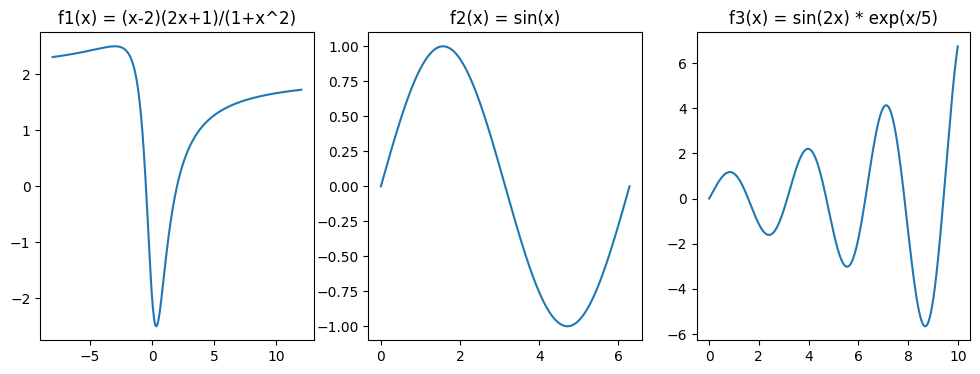

In [2]:
# Visualização inicial das funções
x1 = np.linspace(-8, 12, 500)
x2 = np.linspace(0, 2*math.pi, 500)
x3 = np.linspace(0, 10, 500)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(x1, f1(x1))
plt.title('f1(x) = (x-2)(2x+1)/(1+x^2)')

plt.subplot(1, 3, 2)
plt.plot(x2, f2(x2))
plt.title('f2(x) = sin(x)')

plt.subplot(1, 3, 3)
plt.plot(x3, f3(x3))
plt.title('f3(x) = sin(2x) * exp(x/5)')

#### 1. Geração dos dados

- Para a avaliação de desempenho dos modelos, precisamos simular os datasets de treino. Deste modo, cada dataset será gerado com N = 50 pontos, amostrados de forma aleatória seguindo uma distribuição uniforme no intervalo de interesse, e o valor da saída será perturbado por um ruído gaussiano com média zero e variância σ².

In [3]:
# Geração de dados
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

def generate_dataset(f, x_min, x_max, N, sigma):
    x = np.random.uniform(x_min, x_max, size=N)
    eps = np.random.normal(0, sigma, size=N)
    y = f(x) + eps
    return x.reshape(-1, 1), y

N_TRAIN = 50
SIGMA = 1.0

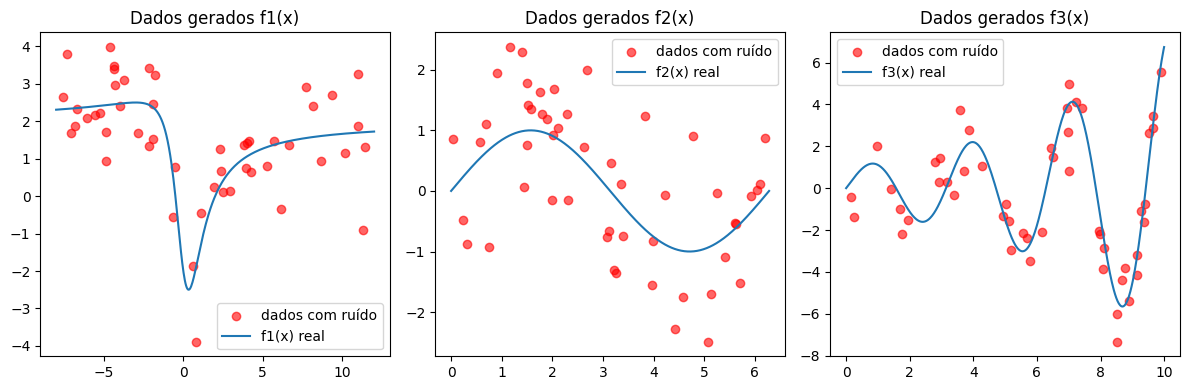

In [4]:
# Visualização dos dados
x_train1, y_train1 = generate_dataset(f1, -8, 12, N_TRAIN, SIGMA)
x_train2, y_train2 = generate_dataset(f2, 0, 2*math.pi, N_TRAIN, SIGMA)
x_train3, y_train3 = generate_dataset(f3, 0, 10, N_TRAIN, SIGMA)

# Plotando datasets com ruído
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(x_train1, y_train1, color='red', alpha=0.6, label='dados com ruído')
plt.plot(x1, f1(x1), label='f1(x) real')
plt.title('Dados gerados f1(x)')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(x_train2, y_train2, color='red', alpha=0.6, label='dados com ruído')
plt.plot(x2, f2(x2), label='f2(x) real')
plt.title('Dados gerados f2(x)')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(x_train3, y_train3, color='red', alpha=0.6, label='dados com ruído')
plt.plot(x3, f3(x3), label='f3(x) real')
plt.title('Dados gerados f3(x)')
plt.legend()

plt.tight_layout()
plt.show()

#### 2. Ajuste de modelos polinomiais

- O próximo passo é treinar modelos polinomiais. Utilizamos regressão linear combinada com transformação polinomial das entradas:
1. Graus de 1 até 20.
2. O objetivo é observar como o aumento do grau reduz o viés, mas aumenta a variância.

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def fit_polynomial_model(x_train, y_train, degree):
    model = make_pipeline(PolynomialFeatures(degree=degree, include_bias=True), LinearRegression())
    model.fit(x_train, y_train)
    return model

def plot_polynomial_fits(x_train, y_train, f, x_range, func_name):
    plt.figure(figsize=(15, 12))
    for i, d in enumerate(range(1, 21), 1):
        model = fit_polynomial_model(x_train, y_train, d)
        y_pred = model.predict(x_range.reshape(-1, 1))
        plt.subplot(4, 5, i)
        plt.scatter(x_train, y_train, color="red", s=10, alpha=0.6)
        plt.plot(x_range, f(x_range), label="f(x)", linewidth=2)
        plt.plot(x_range, y_pred, label=f"grau {d}")
        plt.title(f"{func_name} — grau d = {d}")
        plt.xticks([]); plt.yticks([])
    plt.tight_layout()
    plt.show()

- Na primeira função a ser analisada, **f1(x) = (x-2)(2x+1)/(1+x^2)**, os gráficos iniciais demonstram que em graus baixos, o modelo linear é consideravelmente simples subajustando para os dados dispostos. À medida que aumentamos o grau desse polinômio (por exemplo, em d = 4, 5, ...), o modelo passa a se ajustar melhor à curva real da função. Por outro outro, para valores muitos altos do grau do polinômio, como a partir de d = 15, o modelo torna-se excessivamente flexivel, ajustando-se inclusive ao ruído, que denota um comportamento incorreto.


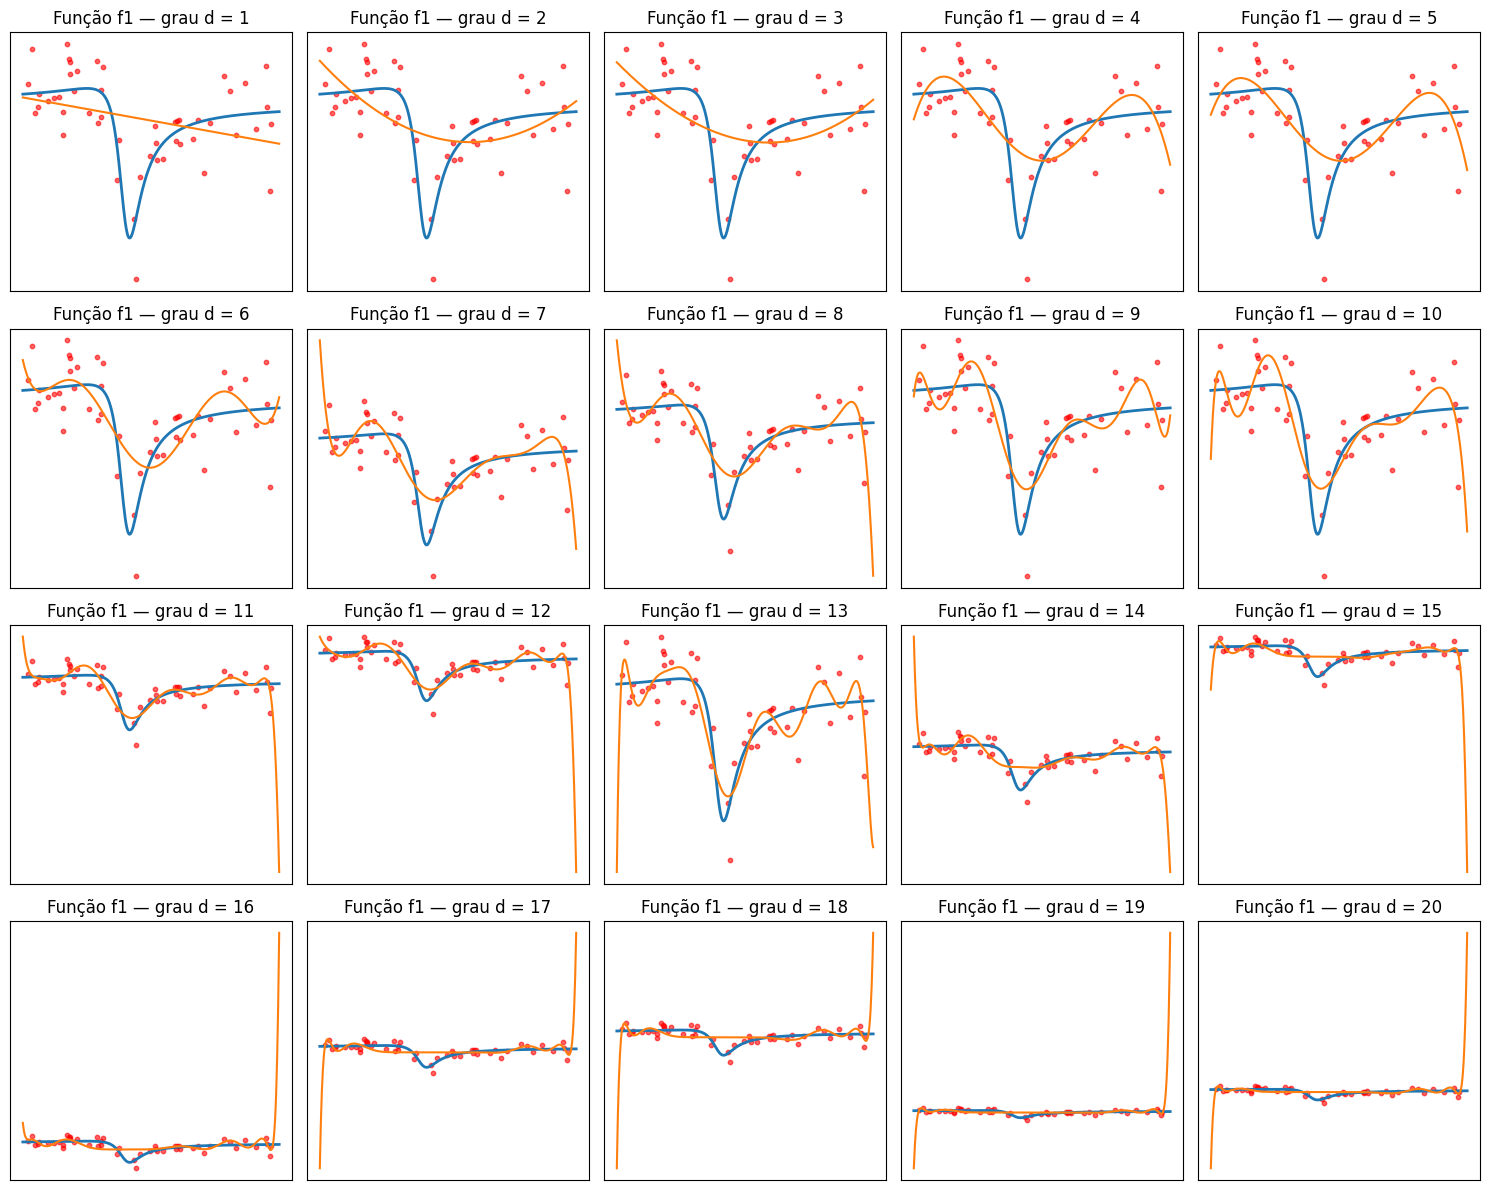

In [6]:
plot_polynomial_fits(x_train1, y_train1, f1, x1, "Função f1")

- Para a segunda função de estudo, **f2(x) = sin (x)**, a regressão polinomial se ajusta melhor à função seno. Tal como no primeiro caso, para valores muito pequenos de d (d = 1 ou d = 2), o modelo apresenta o comportamento de underfitting, não se ajustando à maior parte dos dados de estudo. À medida que o modelo aumenta o grau do polinômio (a partir de d = 3), a curva de seno já era modelada de uma maneira mais eficiente. Modelos de graus muito altos (ex: d > 8, mas especialmente d > 11), trazem outro comportamento não desejado, que é o do overfitting.

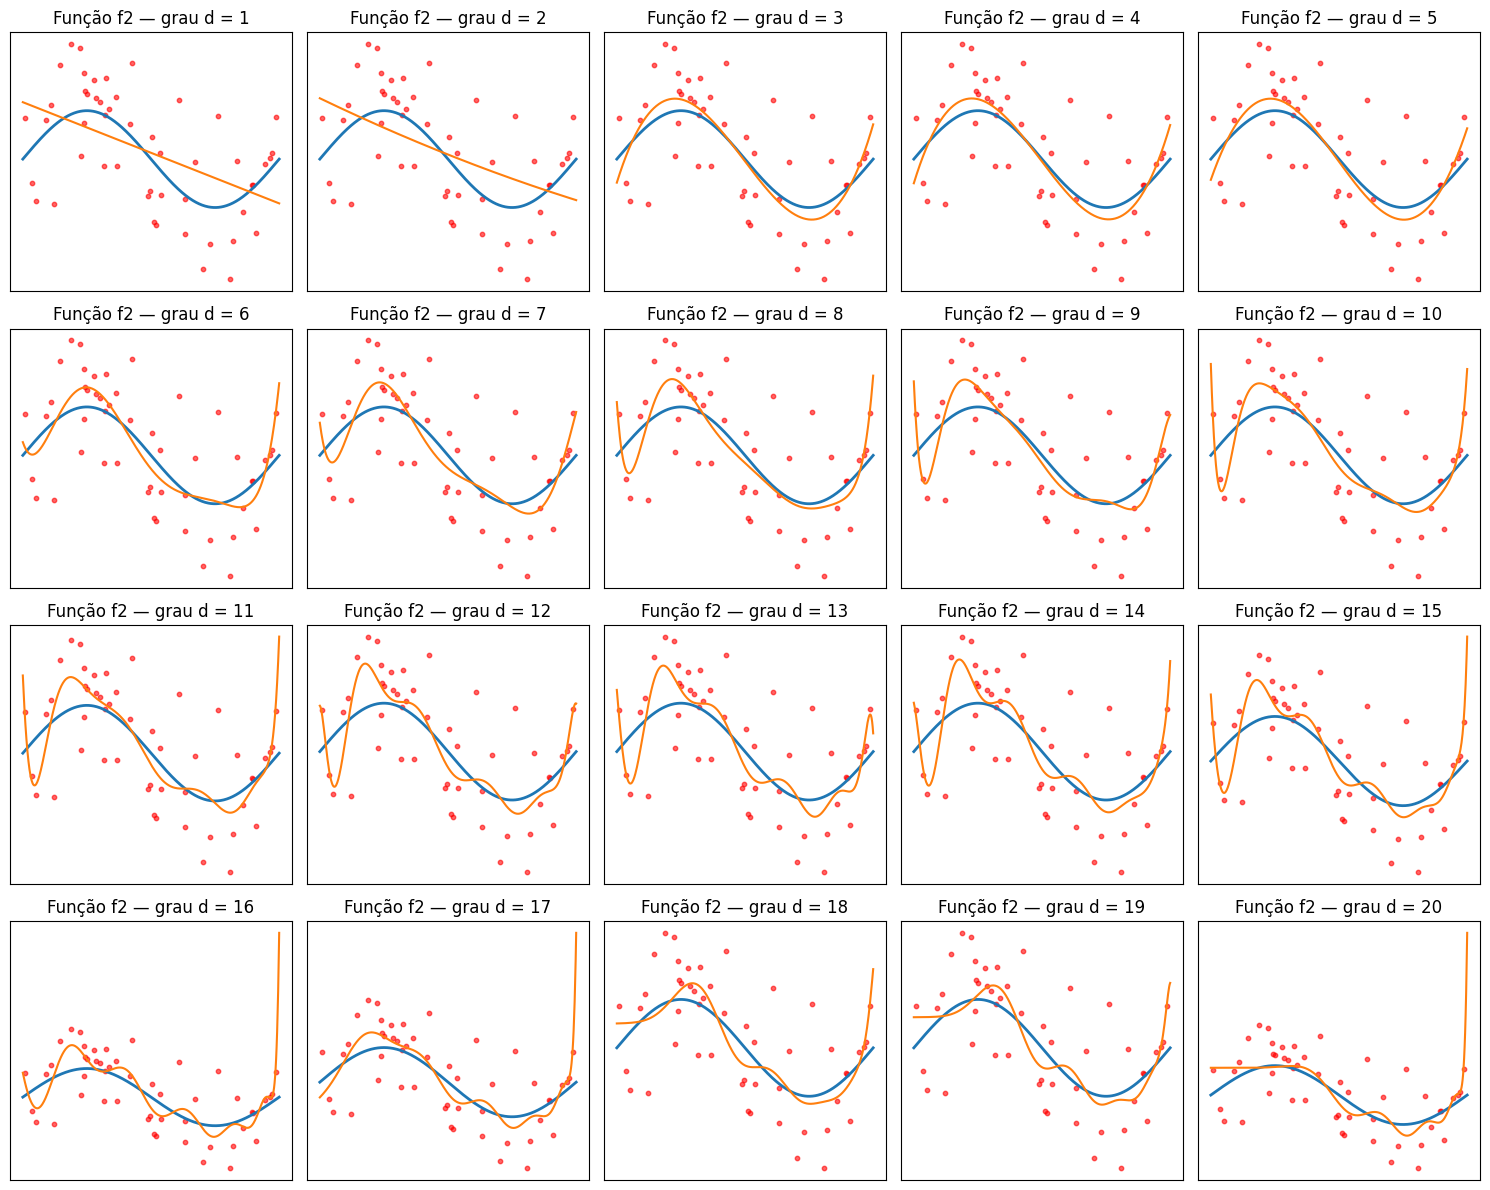

In [7]:
plot_polynomial_fits(x_train2, y_train2, f2, x2, "Função f2")

- Na terceira função de estudo, a **f3(x) = sin(2x) * exp(x/5)** apresenta um comportamento particularmente diferente dos outros dois primeiros exemplos, uma vez que ao se aumentar o valor de x, a função apresentar um caráter exponencial. Dada a sua complexidade, graus menos de polinômios apresentam muita dificuldade em se ajustar à função de estudo. Deste modo, aumentamos o grau do polinômio, o modelo tende a se adaptar melhor ao comportamento da função original. Contudo, dada a complexidade deste terceiro caso, o modelo apresenta um grau de dificuldade até maior em se adequar, de tal forma que a tendência de overfitting só é notada mais tardiamente em comparação aos dois primeiros exemplos.

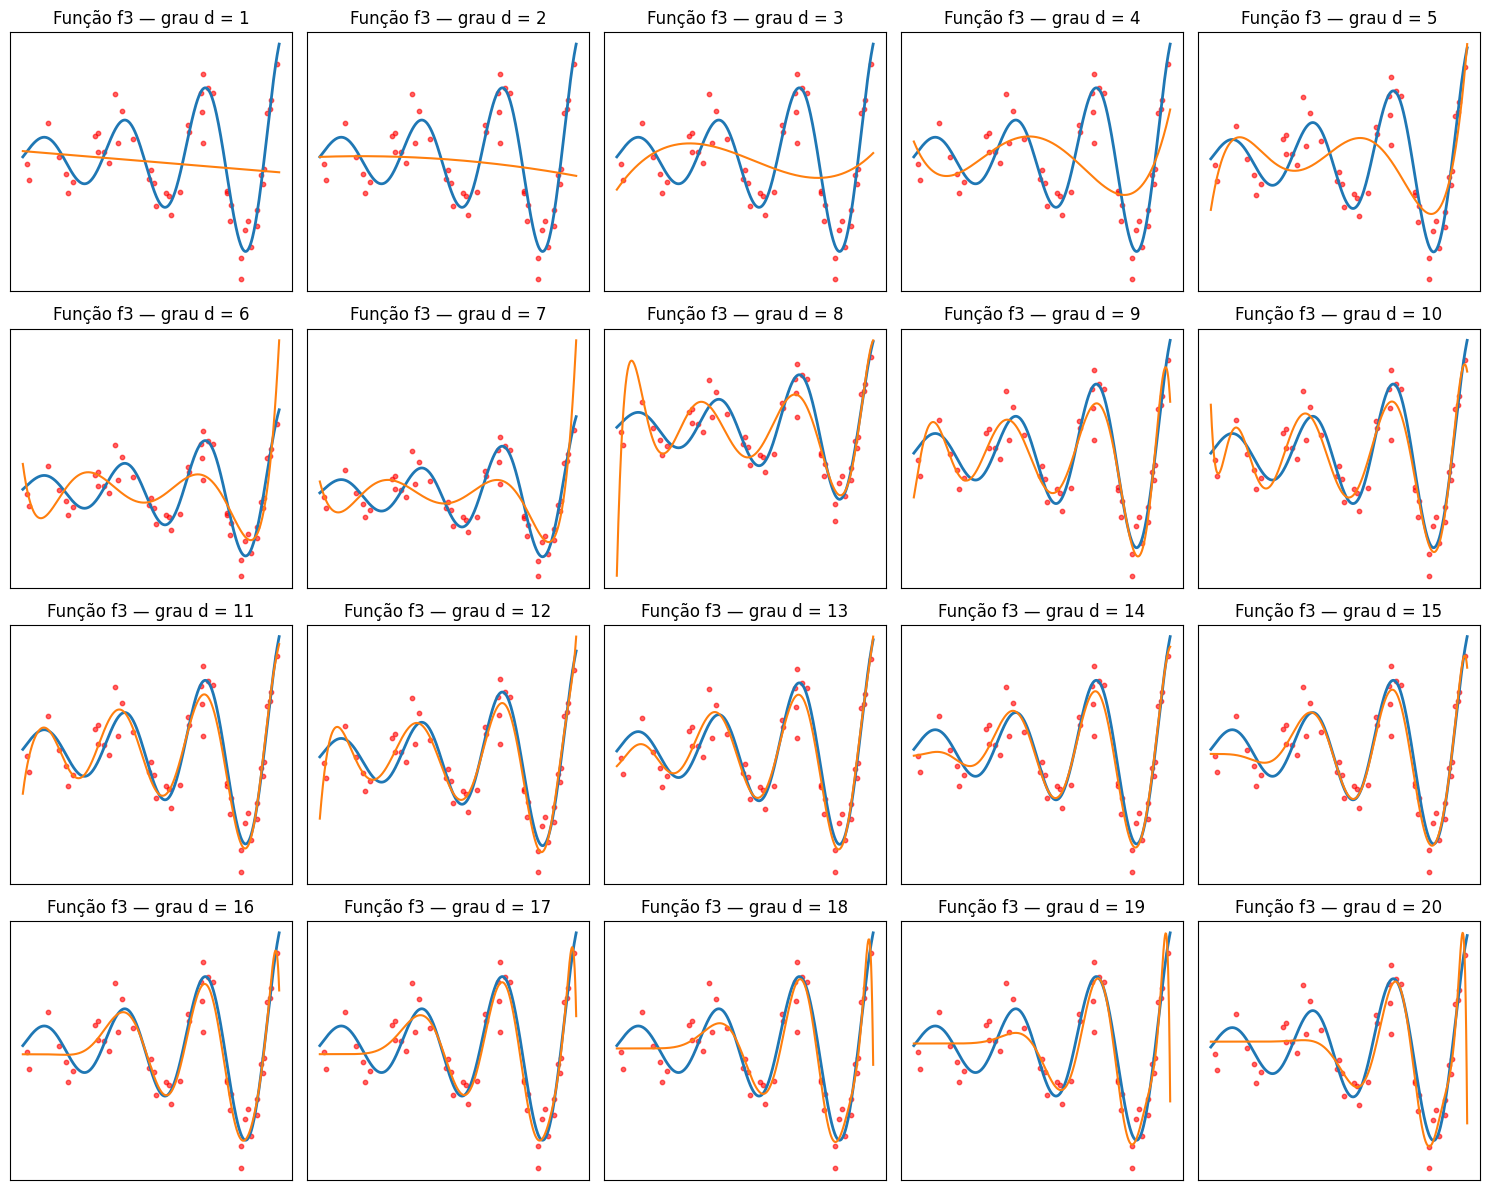

In [8]:
plot_polynomial_fits(x_train3, y_train3, f3, x3, "Função f3")

#### 3. Cálculo do viés-variância

- Neste terceiro momento, repetimos o treinamento várias vezes para capturar a variabilidade dos modelos. Para isso, cada modelo será treinado por 100 conjuntos de dados distintos, em que cada conjunto apresentará 50 amostras. 
- No cálculo abaixo, **bias2_avg** representa o cálculo do viés quadrático, **var_fhat_avg** representa a média de dispersão das predições de cada modelo, **var_eps** representa irredutível, ou seja, a variância do ruído. Finalmente, **mse_test_avg** representa a média do erro médio de todo o processo.

In [9]:
from tqdm import trange

NUM_REPEATS = 100
DEGREES = list(range(1, 21))

def run_experiment(f, x_min, x_max, step, num_repeats=NUM_REPEATS, n_train=N_TRAIN, degrees=DEGREES, sigma=SIGMA):
    x_test = np.arange(x_min, x_max + 1e-8, step)
    X_test = x_test.reshape(-1, 1)
    predictions = {d: np.zeros((num_repeats, len(x_test))) for d in degrees}
    f_x = f(x_test)

    for k in trange(num_repeats, desc='Repetições', leave=False):
        x_train, y_train = generate_dataset(f, x_min, x_max, n_train, sigma)
        for d in degrees:
            model = fit_polynomial_model(x_train, y_train, d)
            predictions[d][k, :] = model.predict(X_test)

    results = {}
    for d in degrees:
        preds = predictions[d]
        mean_pred = preds.mean(axis=0)
        var_fhat = preds.var(axis=0, ddof=0)
        bias2 = (f_x - mean_pred) ** 2
        var_eps = sigma ** 2
        results[d] = {
            'bias2_avg': np.mean(bias2),
            'var_fhat_avg': np.mean(var_fhat),
            'var_eps': var_eps,
            'mse_test_avg': np.mean(bias2 + var_fhat + var_eps)
        }

    return results

In [10]:
results_f1 = run_experiment(f1, -8, 12, 0.1)
results_f1

{1: {'bias2_avg': np.float64(1.3975746548510726),
  'var_fhat_avg': np.float64(0.08085696893069264),
  'var_eps': 1.0,
  'mse_test_avg': np.float64(2.4784316237817654)},
 2: {'bias2_avg': np.float64(0.9438721078007389),
  'var_fhat_avg': np.float64(0.11161987301841607),
  'var_eps': 1.0,
  'mse_test_avg': np.float64(2.055491980819155)},
 3: {'bias2_avg': np.float64(0.9442030962001768),
  'var_fhat_avg': np.float64(0.19672222664307082),
  'var_eps': 1.0,
  'mse_test_avg': np.float64(2.140925322843248)},
 4: {'bias2_avg': np.float64(0.6545056622771342),
  'var_fhat_avg': np.float64(0.2252244128838711),
  'var_eps': 1.0,
  'mse_test_avg': np.float64(1.8797300751610053)},
 5: {'bias2_avg': np.float64(0.60912313554116),
  'var_fhat_avg': np.float64(0.4087367662846189),
  'var_eps': 1.0,
  'mse_test_avg': np.float64(2.017859901825779)},
 6: {'bias2_avg': np.float64(0.4954515415438699),
  'var_fhat_avg': np.float64(0.8583487904734575),
  'var_eps': 1.0,
  'mse_test_avg': np.float64(2.35380033

In [11]:
results_f2 = run_experiment(f2, 0, 2*math.pi, 0.1)
results_f2

{1: {'bias2_avg': np.float64(0.19855061712729713),
  'var_fhat_avg': np.float64(0.047086168640245764),
  'var_eps': 1.0,
  'mse_test_avg': np.float64(1.2456367857675428)},
 2: {'bias2_avg': np.float64(0.19924767017044195),
  'var_fhat_avg': np.float64(0.06891009672926297),
  'var_eps': 1.0,
  'mse_test_avg': np.float64(1.268157766899705)},
 3: {'bias2_avg': np.float64(0.005062520387018814),
  'var_fhat_avg': np.float64(0.07910230529067731),
  'var_eps': 1.0,
  'mse_test_avg': np.float64(1.0841648256776961)},
 4: {'bias2_avg': np.float64(0.006276126431711524),
  'var_fhat_avg': np.float64(0.12131927297440288),
  'var_eps': 1.0,
  'mse_test_avg': np.float64(1.1275953994061143)},
 5: {'bias2_avg': np.float64(0.0014868867884351323),
  'var_fhat_avg': np.float64(0.1753634963916883),
  'var_eps': 1.0,
  'mse_test_avg': np.float64(1.1768503831801234)},
 6: {'bias2_avg': np.float64(0.0016066130396627212),
  'var_fhat_avg': np.float64(0.21920169742702506),
  'var_eps': 1.0,
  'mse_test_avg': np

In [12]:
results_f3 = run_experiment(f3, 0, 10, 0.1)
results_f3

{1: {'bias2_avg': np.float64(6.386755522666771),
  'var_fhat_avg': np.float64(0.297037011309138),
  'var_eps': 1.0,
  'mse_test_avg': np.float64(7.683792533975908)},
 2: {'bias2_avg': np.float64(6.365718779185264),
  'var_fhat_avg': np.float64(0.6095829512237481),
  'var_eps': 1.0,
  'mse_test_avg': np.float64(7.975301730409013)},
 3: {'bias2_avg': np.float64(6.385805627616581),
  'var_fhat_avg': np.float64(1.1831222851144616),
  'var_eps': 1.0,
  'mse_test_avg': np.float64(8.568927912731041)},
 4: {'bias2_avg': np.float64(5.786146413332391),
  'var_fhat_avg': np.float64(1.9517015109649212),
  'var_eps': 1.0,
  'mse_test_avg': np.float64(8.73784792429731)},
 5: {'bias2_avg': np.float64(4.668204416394637),
  'var_fhat_avg': np.float64(3.1061640182533576),
  'var_eps': 1.0,
  'mse_test_avg': np.float64(8.774368434647995)},
 6: {'bias2_avg': np.float64(4.308547011770292),
  'var_fhat_avg': np.float64(11.61628215008675),
  'var_eps': 1.0,
  'mse_test_avg': np.float64(16.92482916185704)},
 

#### 4. Discussão e visualização dos resultados 

- Nas três funções, foi observado um mesmo comportamento no que se refere ao viés quadrático (Bias^2), variância (f-hat) e erro de teste (MSEtest). Apesar da distorção dos gráficos ocasionada pela variância e erro de teste, o viés quadrático começa maior e decai à medida que o polinômio aumenta o seu respectivo grau, fazendo com que os modelos se adequem melhor às curvas. Por outro lado, a variância começa pequena e cresce exponenciamente uma vez que o modelo passa a se adequar aos dados ruidosos. Por esse motivo, o Erro de Teste tende a acompanhar este comportamento de crescer ao se aumentar demasiadamente o grau do polinômio, ao se observar o comportamento de overfitting.

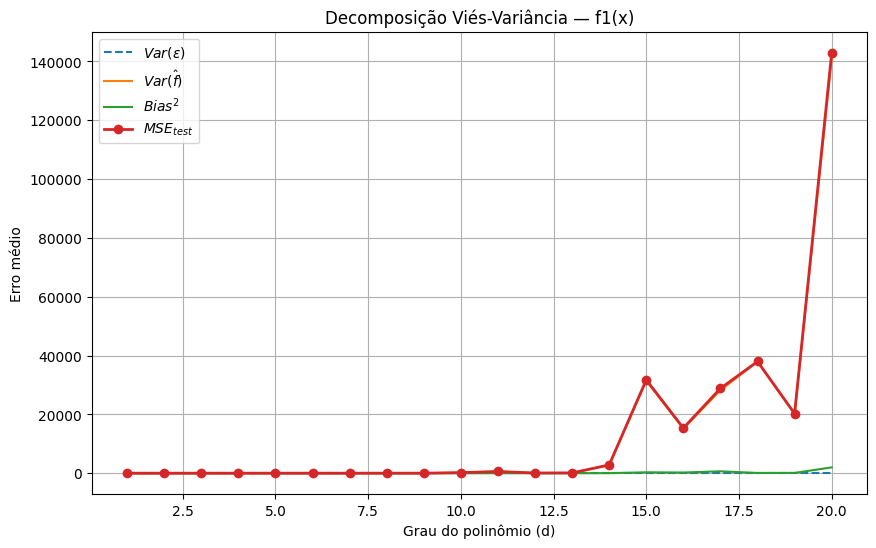

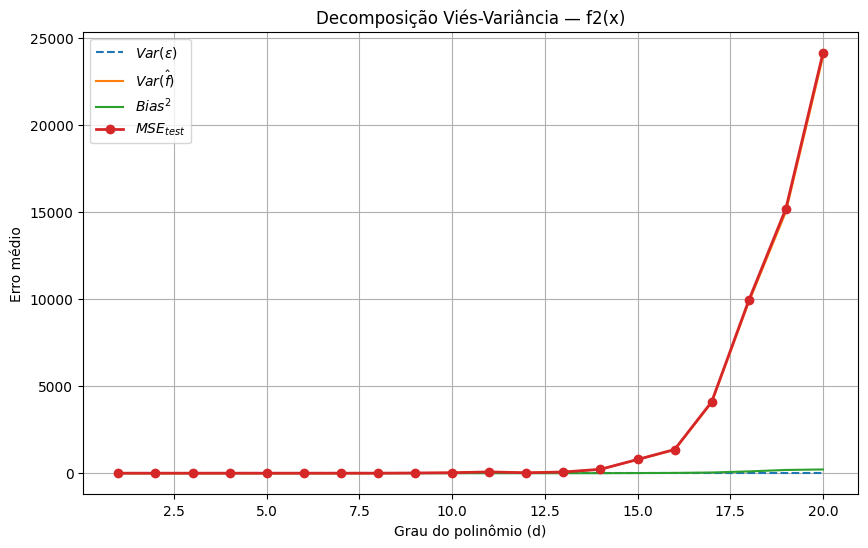

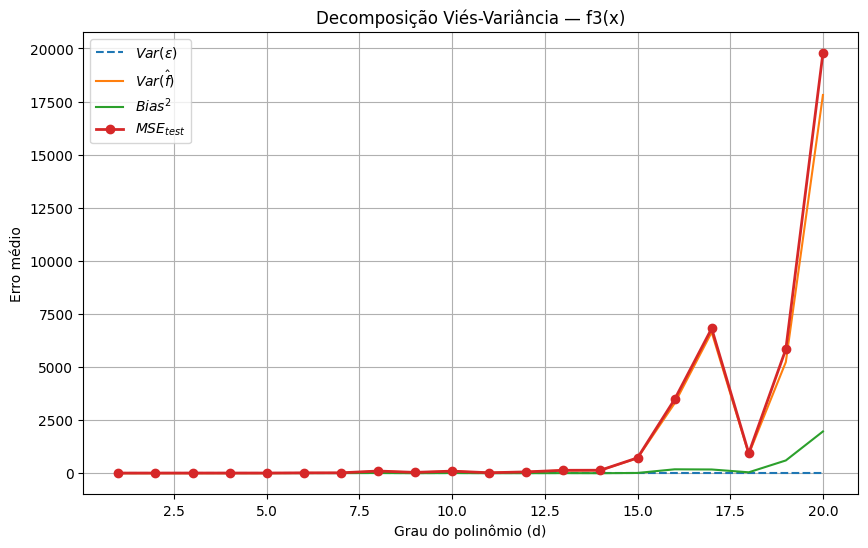

In [13]:
for name, results in zip(["f1", "f2", "f3"], [results_f1, results_f2, results_f3]):
    bias2_avg = [results[d]['bias2_avg'] for d in DEGREES]
    var_fhat_avg = [results[d]['var_fhat_avg'] for d in DEGREES]
    var_eps = [results[d]['var_eps'] for d in DEGREES]
    mse_avg = [results[d]['mse_test_avg'] for d in DEGREES]


    plt.figure(figsize=(10, 6))
    plt.plot(DEGREES, var_eps, label=r'$Var(\epsilon)$', linestyle='--')
    plt.plot(DEGREES, var_fhat_avg, label=r'$Var(\hat{f})$')
    plt.plot(DEGREES, bias2_avg, label=r'$Bias^2$')
    plt.plot(DEGREES, mse_avg, label=r'$MSE_{test}$', linewidth=2, marker='o')
    plt.xlabel('Grau do polinômio (d)')
    plt.ylabel('Erro médio')
    plt.title(f'Decomposição Viés-Variância — {name}(x)')
    plt.legend()
    plt.grid(True)
    plt.show()